In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [30]:
class SEIR_Model:
    """ Implements the SEIR Compartmental model
    https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
    
    Plus a Q state
     
    Population moves through states
    S = Susceptible
    E = Exposed
    I = Infectious
    R = Recovered
    
    n = number of days to run
    R0 = basic reproduction number
    a = mean number of days exposed but not infectious
    T = mean number of days you are infectious
    CFR = Case Fatality Rate
    *_0 = the initial population values for SEIR
    
    
    """
    def __init__(self, n, R0, a, T, CFR, S_0, E_0, I_0, R_0=0):
        
        self.n = n
        self.R0 = R0
        self.a = a
        self.T = T
        self.CFR = CFR
        self.S_0, self.E_0, self.I_0, self.R_0 = S_0, E_0, I_0, R_0
        
        self.gamma = 1./self.T
        self.beta = self.R0*self.gamma
        self.M = pd.DataFrame([[self.S_0, self.E_0, self.I_0, self.R_0]], columns = ["S", "E", "I", "R"], index=[[0]])
        
    def update(self):
        s, e, i, r = self.M.iloc[-1]
        N = s + e + i + r
        sp = s - self.beta*i*s/N
        ep = e + self.beta*i*s/N - e/a
        ip = i + e/a - self.gamma*i
        rp = r + self.gamma*i
        m = pd.DataFrame([[sp,ep,ip,rp]], columns=self.M.columns)
        self.M = self.M.append(m, ignore_index=True)

    def run(self):
        for i in range(self.n):
            self.update()
        self.uninfected = (self.M["S"].min())/self.M["S"].max()
        self.dead = self.CFR*self.M["R"].max()/self.M["S"].max()
        self.infected_peak = self.M["I"].max()/self.M["S"].max()
        self.exposed_peak = self.M["E"].max()/self.M["S"].max()
        return self
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        self.M.plot(ax=ax)
        fig.suptitle("SEIR Model\n %d Days, R0=%0.2f, a=%0.2f, T=%0.2f" % (self.n, self.R0, self.a, self.T) )
        ax.set_xlabel('Days')
        ax.set_ylabel('Population')
        ax.text(.05, .50, 
                "uninfected = %0.2f%%\ndead = %0.2f%%\ninfected_peak = %0.2f%%\nexposed_peak = %0.2f%%"
                % (self.uninfected*100, self.dead*100, self.infected_peak*100, self.exposed_peak*100),
                transform=ax.transAxes, ha="left", va="top", bbox=dict(fc="none"))
        

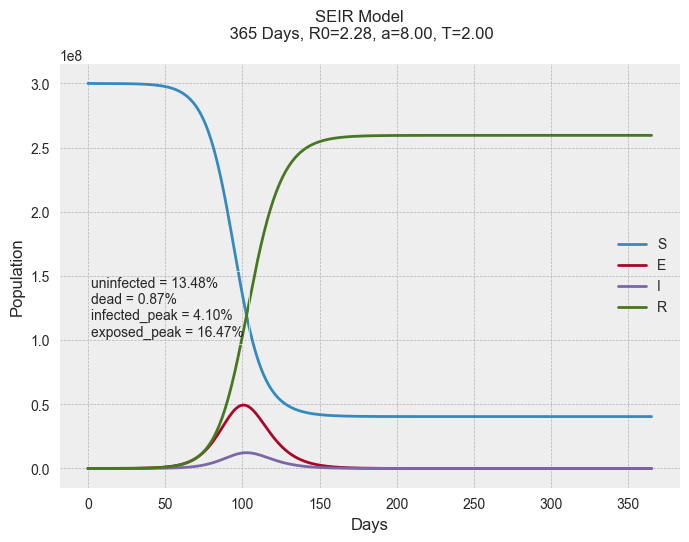

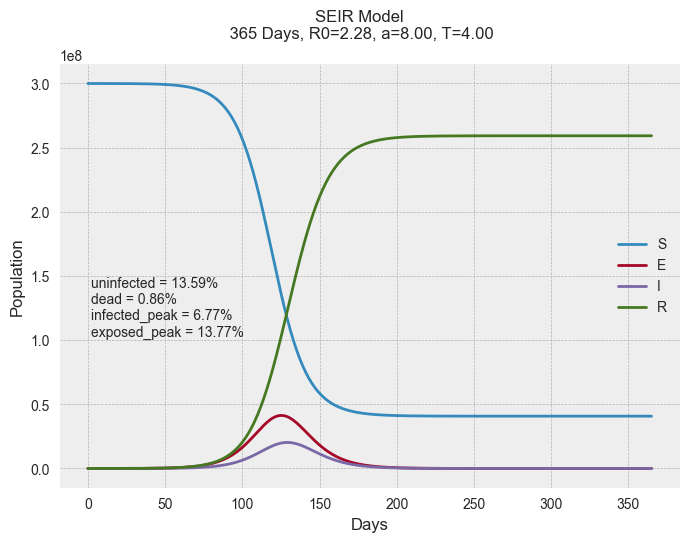

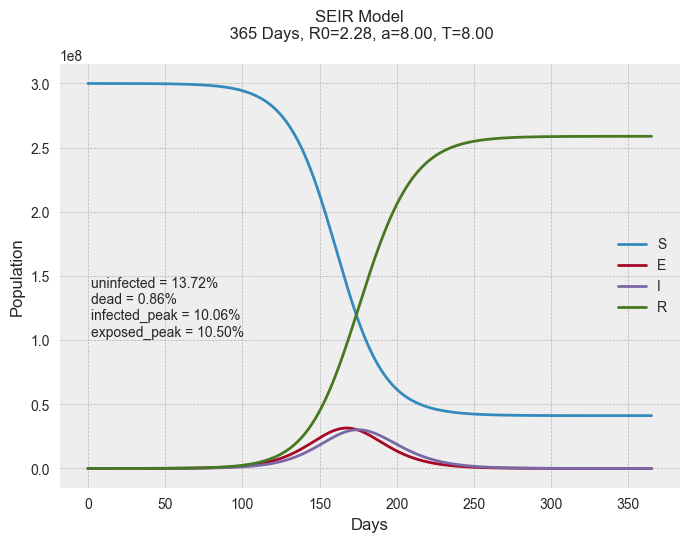

In [31]:
# Some data from the US for 2020-03-12

R0  = 2.28     # Basic reproduction number
a   = 8     # mean days incubation
T   = 2     # mean days of infectivity
CFR = 0.01

S_0 = 300000000 # Initial susceptible population
E_0 = 5000      # Initial Exposed population
I_0 = 2000       # Initial infected population

SEIR_Model(365, R0, a, T, CFR, S_0, E_0, I_0).run().plot()
SEIR_Model(365, R0, a, 2*T, CFR, S_0, E_0, I_0).run().plot()
SEIR_Model(365, R0, a, 4*T, CFR, S_0, E_0, I_0).run().plot()